In [1]:
print('EDA for a Bank Marketing Campaign and deciding factors - Anurag Agarwal')

EDA for a Bank Marketing Campaign and deciding factors - Anurag Agarwal


> #### EDA for a Bank Marketing Campaign and deciding factors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly, io as style

In [3]:
a= pd.read_excel('Attribute details.xlsx')
a.head(3)

,Attributes details,Unnamed: 1
0,Customer id,This column is about the id of the customer co...
1,age,This column consists of the age of each customer
2,salary,This column represents monthly salary of the c...


In [4]:
## Section based on the file

bm= pd.read_csv('bankupdated.csv')

bm.head(3)

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no


In [5]:
## skip row will remove unnecessery headers or rows

bm= pd.read_csv('bankupdated.csv', skiprows=2)
bm.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [6]:
bm.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [7]:
## average age of customers

bm.age.mean()

40.93565090394105

In [8]:
bm.shape

(45211, 19)

In [ ]:
## Cleaning data

In [9]:
# 1. delet cust id

bm.drop("customerid", axis=1, inplace= True)

In [10]:
# 2. Split jobedu to job and education

bm['job']= bm.jobedu.apply(lambda x: x.split(",")[0])

bm['edu']= bm.jobedu.apply(lambda x: x.split(",")[1])

In [11]:
# 3. now drop jobedu col as we alraedy created job and edu col

bm.drop("jobedu", axis=1, inplace= True)

In [12]:
## recheck data

bm.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [13]:
## data cleaning for missing or null values

bm.isnull().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [ ]:

## age have missing 20 which will convert in to int
## month have 50 missing values so first we need to handle that
## resonce have 30 missing value

## we need to clear all this data


In [14]:
## first will clean age col

float(100.0*20/452111) ## as value is less then 0.001 percent will delet the data

0.004423692411819221

In [15]:
## as value is less then 0.001 percent will delet the data

bm1= bm[~bm.age.isnull()].copy()

bm1.age.isnull().sum()


0

In [16]:
## will clean month col.

float(100.0*50/452111) 


0.011059231029548054

In [17]:
## avg of month null val is 0.01. we can drop this data too. but will use new starategy to replace it with month

bm.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [18]:


bm1.month.fillna(bm1.month.value_counts()[0], inplace=True)

bm1.head()


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
bm1.month.isnull().sum()

0

In [20]:
bm1.month.value_counts(normalize= True)

may, 2017    0.304043
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
13740        0.001106
Name: month, dtype: float64

In [21]:
## spliting month

bm1['month']= bm1["month"].apply(lambda x : str(x).split(",")[0])
bm1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown


In [22]:
## pdays and response col

bm1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [23]:
## pdays missing values which is showing -1

bm1.pdays.value_counts()

-1      36939
 182      167
 92       146
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 558, dtype: int64

In [24]:
## -1 is in data is having count of 36939 hence we can not drop it

bm1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [25]:
## replace -1 with NaN, as statical calculations will automaticly ignore it

bm1.loc[bm1.pdays<0,"pdays"]= np.NaN

In [26]:
## replaced -1, and now calculations ignored NaN

bm1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [27]:
## cleaning and droping responce col as

float(100.0*30/452111)


0.006635538617728832

In [28]:
## as value is less then 0.001 percent will delet the data

bm2= bm1[~bm1.response.isnull()].copy()

bm2.response.isnull().sum()

0

In [29]:
bm2.shape

(45161, 19)

In [30]:
bm2.isnull().sum()

age             0
salary          0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays       36915
previous        0
poutcome        0
response        0
job             0
edu             0
dtype: int64

In [ ]:
## Handaling outliers for numerical values cols which are- age, salary, balance, 

In [31]:
# for age

bm1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

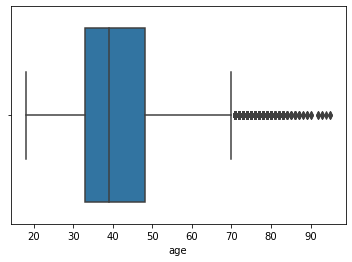

In [32]:
## as we see not much difference bw data point hence no outliers, will verify with boxplot

sns.boxplot(bm1.age)
plt.show()

In [33]:
### for Balance

bm1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

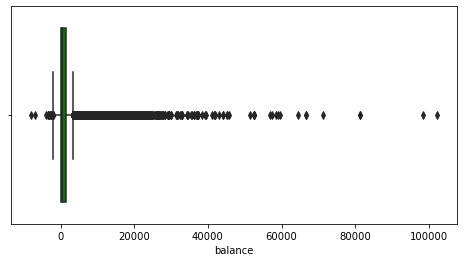

In [34]:
## as we say huge diff bw percentile will use more methods to check if outliers are valid or essential

plt.figure(figsize=[8,4])
sns.boxplot(bm1.balance, color='green')

In [35]:
### as we can see still some data is in outlier range we check it further by looking the quantlies

bm1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [36]:
## we need to see the data which is higher the 0.99 percentile/quantile to check if its genuine and essential or not

bm1[bm1.balance>15000].describe()


,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [37]:
## its all valid and important data as these people shows positive interestin campaign

bm1[bm1.balance>15000].head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
334,45.0,100000,24598,divorced,no,no,yes,no,unknown,5,may,313 sec,3,NaN,0,unknown,no,management,tertiary
446,39.0,60000,45248,single,no,no,yes,no,unknown,6,may,1623 sec,1,NaN,0,unknown,yes,technician,unknown
920,44.0,50000,58544,married,yes,no,yes,no,unknown,7,may,144 sec,2,NaN,0,unknown,no,admin.,secondary
2065,55.0,55000,18722,married,yes,no,yes,no,unknown,12,may,128 sec,2,NaN,0,unknown,no,retired,secondary
2343,26.0,60000,24299,single,yes,no,yes,no,unknown,13,may,704 sec,1,NaN,0,unknown,no,technician,secondary


In [38]:
## For salary

bm1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

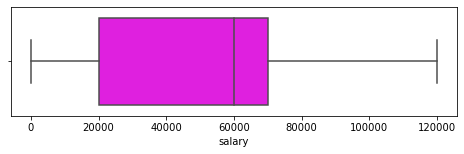

In [39]:
##to check outliers in salary

plt.figure(figsize=[8,2])
sns.boxplot(bm1.salary, color='magenta')

In [40]:
##to check outliers in salary as we can see no difference bw 0.99 to max

bm1.salary.quantile([0.5,0.7,0.9,0.95,0.99])

0.50     60000.0
0.70     70000.0
0.90    100000.0
0.95    100000.0
0.99    120000.0
Name: salary, dtype: float64

In [41]:
### Standardization of Data

print('### Standardization of Data')

### Standardization of Data


In [ ]:
3#Checklist for data standardization exercises:

# standardise units: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
# Scale values if required: Make sure all the observations under one variable have a common scale.
# Standardise precision for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
# Remove extra characters such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
# Standardise case: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
# Standardise format: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

In [42]:
bm1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [43]:
bm1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [44]:
## As some values are in sec and some are in mins will convert the whole duration format in mins

bm1.duration = bm1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [45]:
bm1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [46]:
## re- check

bm1.duration.head()

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [47]:
print(' EDA- 2-a Univariate Analysis')
print(' EDA- 2-a Univariate Analysis')
print(' EDA- 2-a Univariate Analysis')
print(' EDA- 2-a Univariate Analysis')
print(' EDA- 2-a Univariate Analysis')

 EDA- 2-a Univariate Analysis
 EDA- 2-a Univariate Analysis
 EDA- 2-a Univariate Analysis
 EDA- 2-a Univariate Analysis
 EDA- 2-a Univariate Analysis


In [48]:
### Categorical Unordered Univariate Analysis

# marital and jobs are under categorical unorderd

bm1.marital.value_counts()



married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

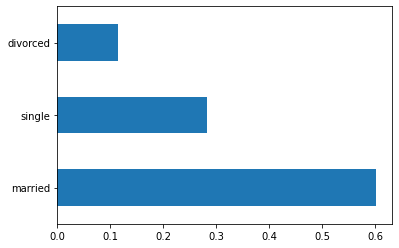

In [49]:
bm1.marital.value_counts(normalize=True).plot.barh()
plt.show()

In [48]:
##- catergories blood group and male female


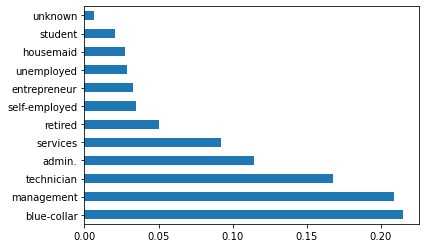

In [50]:
## Which of the two job categories are the least and the most contacted by the bank respectively?

bm1.job.value_counts(normalize=True).plot.barh()
plt.show()

# least- student and Most- Blue-collor

In [51]:
### Categorical Ordered Univariate Analysis

## Age, Education, month, response

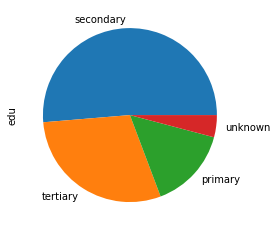

In [51]:
# for education

bm1.edu.value_counts(normalize=True).plot.pie()
plt.show()

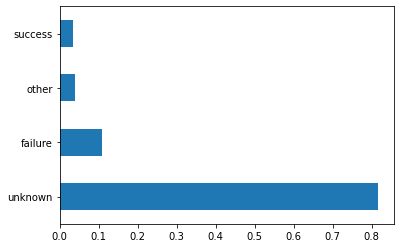

In [52]:
# previoues outcome

bm1.poutcome.value_counts(normalize=True).plot.barh()
plt.show()

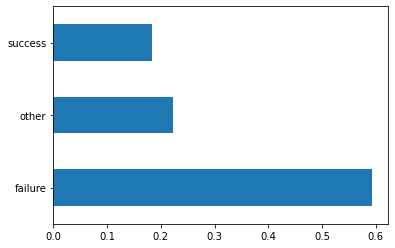

In [53]:
# previoues outcome- remove unkonwn

bm1[~(bm1.poutcome=='unknown')].poutcome.value_counts(normalize=True).plot.barh()
plt.show()

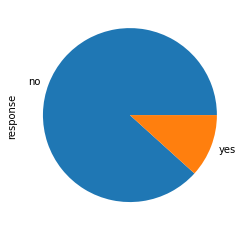

In [54]:
# for response

bm1.response.value_counts(normalize=True).plot.pie()
plt.show()

In [61]:
#### practice- 

# 1- order categorical- dates in year and rating at zomato
#2- salary- draw a histogram, if min in no income then standard is good and vice versa



In [55]:
print(' EDA-3 bivariate / Multivariate Analysis')
print(' EDA-3 bivariate / Multivariate Analysis')
print(' EDA-3 bivariate / Multivariate Analysis')
print(' EDA-3 bivariate / Multivariate Analysis')
print(' EDA-3 bivariate / Multivariate Analysis')

 EDA-3 bivariate / Multivariate Analysis
 EDA-3 bivariate / Multivariate Analysis
 EDA-3 bivariate / Multivariate Analysis
 EDA-3 bivariate / Multivariate Analysis
 EDA-3 bivariate / Multivariate Analysis


In [63]:
## q-1 In the ‘Attribute Dataset’, there is a column named ‘Style’, which contains the different style categories of women's apparel. Certain categories whose total sales is less than 50,000 across all the seasons are grouped under a single category named ‘Others’.

# Which of the following categories under the ‘Style’ column can be grouped in the ‘Others’ category? Perform the grouping operation in the notebook for further analysis.

# (note: this can have multiple correct answers, select all which fulfil the requirement

In [57]:
bm1.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary


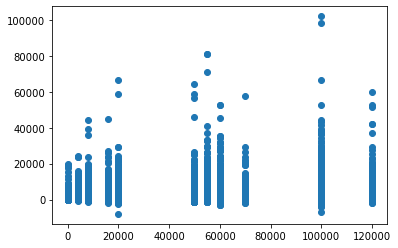

In [59]:
## Numeric- Numeric

plt.scatter(bm1.salary, bm1.balance)
plt.show()

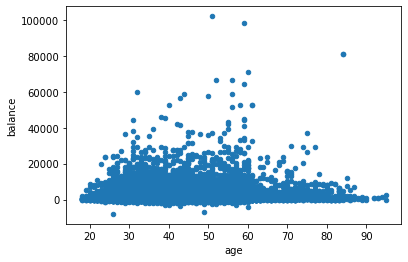

In [60]:
bm1.plot.scatter(x='age', y='balance')
plt.show()

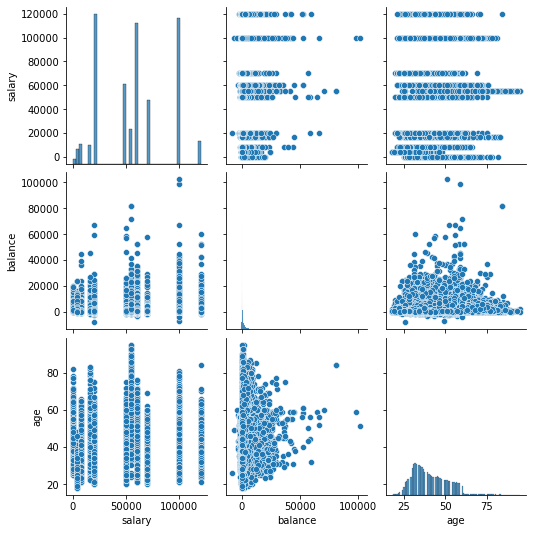

In [61]:
sns.pairplot(data= bm1, vars=['salary','balance','age'])
plt.show()

In [62]:
## as we coudnt find much relation with these plots, it is better to use Corelation chart. or heat map

bm1[['age','balance','salary']].corr()


,age,balance,salary
age,1.000000,0.097755,0.024374
balance,0.097755,1.000000,0.055505
salary,0.024374,0.055505,1.000000


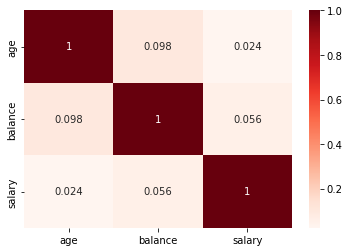

In [66]:
## now plot the heatmap for corelation

sns.heatmap(bm1[['age','balance','salary']].corr(),annot= True, cmap='Reds')
plt.show()

In [68]:
## Numeric - Catagorical

# eg- catagorical- response, Numercial- age, salary, balance

In [69]:
# response vs salary

bm1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [70]:
bm1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

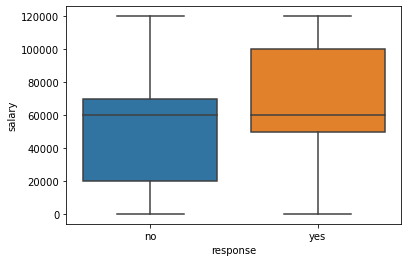

In [71]:
## box plot for slary and response

sns.boxplot(data= bm1, x='response', y='salary')
plt.show()

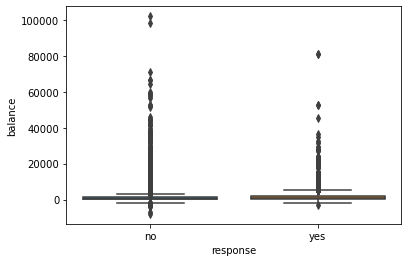

In [72]:
## Response vs balance

sns.boxplot(data= bm1, x='response', y='balance')
plt.show()

## nothing is clear from plot

In [73]:
bm1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

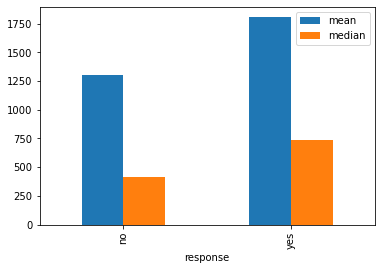

In [80]:
bm1.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

In [86]:
bm1.groupby('edu')['response'].value_counts()

edu        response
primary    no           6248
           yes           591
secondary  no          20732
           yes          2448
tertiary   no          11292
           yes          1994
unknown    no           1604
           yes           252
Name: response, dtype: int64

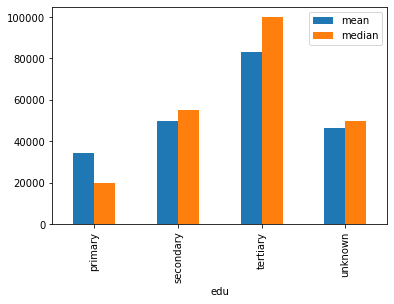

In [85]:
## for education vs salary highest mean and least median

bm1.groupby('edu')['salary'].aggregate(['mean','median']).plot.bar()
plt.show()

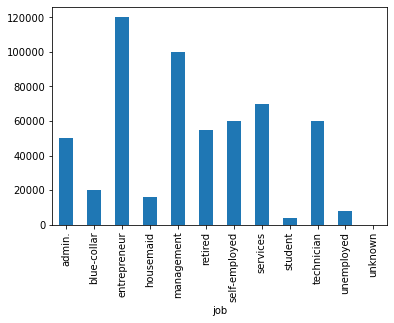

In [91]:
bm1.groupby('job')['salary'].mean().plot.bar()
plt.show()

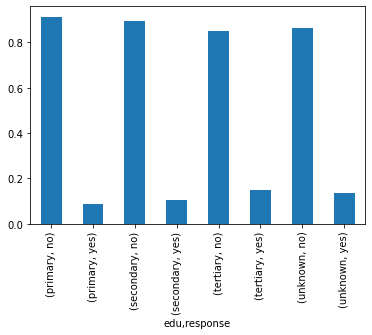

In [106]:
### Catagorical vs Catagorical

# eduvs resonse


## method 1

bm1.groupby('edu')['response'].value_counts(normalize=True).plot.bar()
plt.show()

In [108]:
# method 2

## in response convert yes and no in 1 and 0

bm1['response1']= np.where(bm1.response=='yes',1,0)

bm1.response1.value_counts()

0    39906
1     5285
Name: response1, dtype: int64

In [109]:
bm1.response1.value_counts(normalize=True)

0    0.883052
1    0.116948
Name: response1, dtype: float64

In [110]:
bm1.response1.mean()

0.11694806488017526

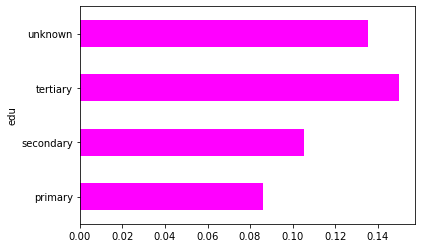

In [139]:
bm1.groupby('edu')['response1'].mean().plot.barh(color='magenta')
plt.show()

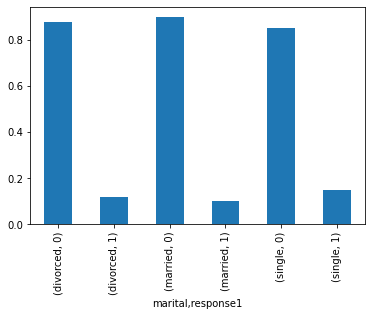

In [117]:
## Marital vs Response

bm1.groupby('marital')['response1'].value_counts(normalize=True).plot.bar()
plt.show()


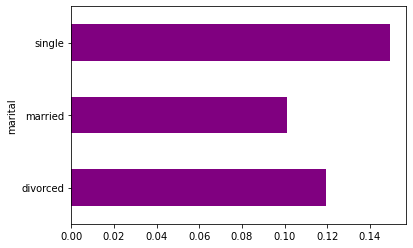

In [136]:
bm1.groupby('marital')['response1'].mean().plot.barh(color='purple')
plt.show()

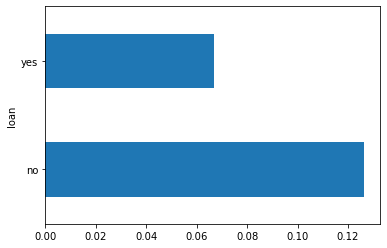

In [118]:
## loan vs Response

bm1.groupby('loan')['response1'].mean().plot.barh()
plt.show()

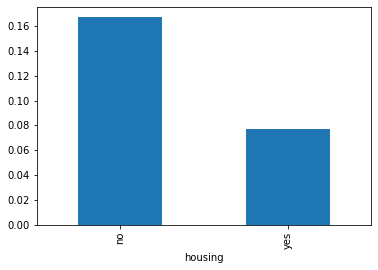

In [120]:
# hosuing vs response

bm1.groupby('housing')['response1'].mean().plot.bar()
plt.show()

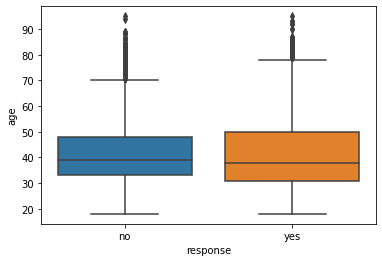

In [121]:
# age vs res

sns.boxplot(data= bm1, x='response', y='age')
plt.show()

In [125]:
## craete the bins for age

bm1['ageg']= pd.cut(bm1.age,[0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

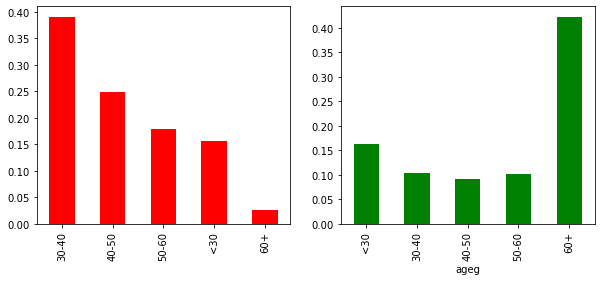

In [134]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
bm1.ageg.value_counts(normalize=True).plot.bar(color='red')

plt.subplot(1,2,2)
bm1.groupby('ageg')['response1'].mean().plot.bar(color='green')

plt.show()

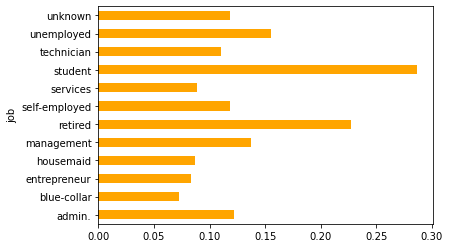

In [135]:
## job vs response

bm1.groupby('job')['response1'].mean().plot.barh(color='orange')
plt.show()

In [140]:
### Multivariate

## edu vs marital vs respnse

bm1.response.value_counts(normalize=True)


no     0.882974
yes    0.117026
Name: response, dtype: float64

In [141]:
### center is yes= 0.117

In [143]:
## to analyse such data we need pivot table 2 category and 1 numerical

res= pd.pivot_table(data=bm1, index='edu', columns='marital', values='response1')
res

marital,divorced,married,single
edu,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


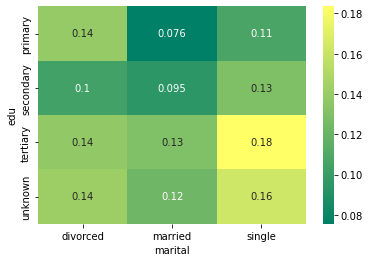

In [148]:
sns.heatmap(res, annot=True, cmap='summer')
plt.show()

## cmap defines color

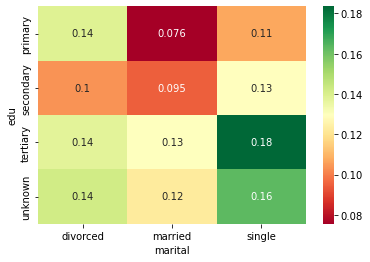

In [149]:
## more clarity to define where red is negative , yellow- neutral, green- positive

sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()

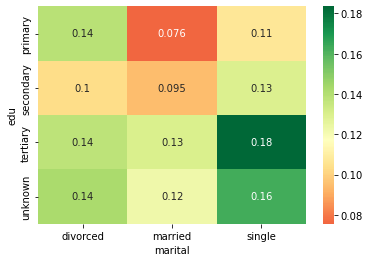

In [151]:
## Center= overall positive response rate which we get from bm1.response.value_counts(normalize=True) or neutral value
# so anything above center is green, lower is red and neutral is yellow

sns.heatmap(res, annot=True, cmap='RdYlGn', center= 0.117)
plt.show()

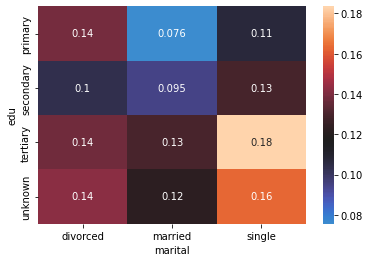

In [152]:
## without cmap- tough to understand

sns.heatmap(res, annot=True, center= 0.117)
plt.show()

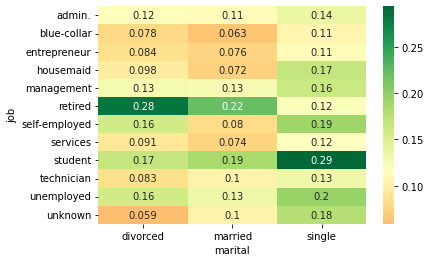

In [158]:
## Job Vs Marital vs response1

res= pd.pivot_table(data=bm1, index='job', columns='marital', values='response1')

sns.heatmap(res, annot=True, cmap='RdYlGn', center= 0.117)

plt.show()

In [162]:
## edu Vs poutcome vs response1

# center for this

bm1[bm1.pdays>0].response1.mean()

0.23061076102762967

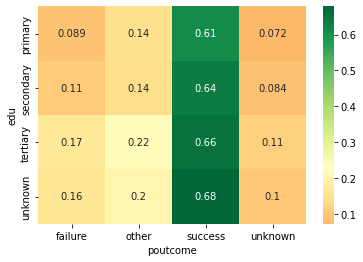

In [165]:
## edu Vs poutcome vs response1

res= pd.pivot_table(data=bm1, index='edu', columns='poutcome', values='response1')

sns.heatmap(res, annot=True, cmap='RdYlGn', center= 0.2306)

plt.show()